

# Project: Investigating No-Show Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Our data set is about the show and no-show for patients on their appointments. We will try to find if their any correlation between some of the attributes we have and no-showing up.

> Impotant columns to focus:
- Gender, Age, Hipertension, Diabetes, Handcap, Alcoholism, SMS_received
- Neighbourhood: How much is the patient close to the hospital or the clinic?
- Scholarship: Does the patient has a full health insurance?
- No-show: If 'No' means that he showed up and vice-versa.

In [101]:
# import statements for all of the packages.
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [102]:
# Loading data and print out a few lines.

df = pd.read_csv('no_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


   # Cool! no missing data.

In [104]:
df.shape

(110527, 14)

In [105]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### As we see here there are some columns which do not play an important role in the statistics analysis in our data set. These mostly all the ID's columns. There is a negative value in Age which intuitivly wrong and to be removed.

In [148]:
inconsistent =df[df['Age'] == -1]
inconsistent

,Gender,Age,Neighbourhood,Scholarship,Hipertension,SMS_received,No-show
99832,F,-1,ROMÃO,0,0,0,No


In [158]:
df.drop(index=df[df['Age'] == -1].index, inplace= True)

> 
# Data Cleaning.

In [106]:
# Dropping all non important columns.
non_important_col = ['PatientId','AppointmentID','ScheduledDay','AppointmentDay']
df.drop(non_important_col, axis=1, inplace= True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## I prefer to keep the categorical columns in integer data type for purpose of drawing.

In [107]:
# last check before data visualization part
df.isnull().sum()

Gender           0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
No-show          0
dtype: int64

In [108]:
# checking fo duplicates
df.duplicated().sum()

68974

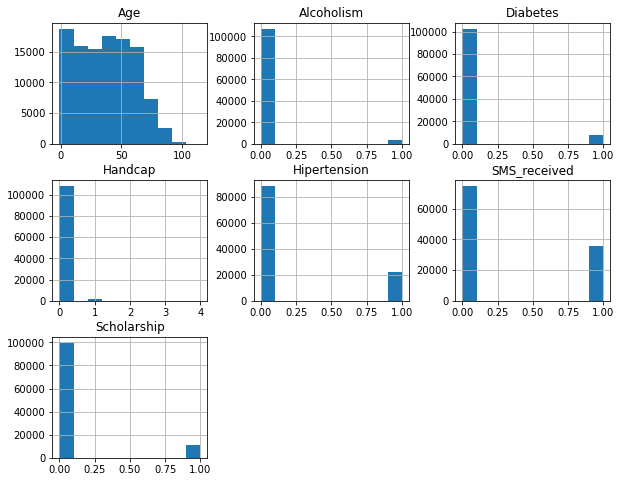

In [109]:
# Quick look
df.hist(figsize= (10,8))
plt.show()

###   you can figure out from the graph tha the percectage of people who are Diabetic, have a Handcap, or Alcoholism are very small. So, we can not conclude any correlation between these columns and showing up. I will choose to drop these coumns to make my data thinner.  

In [110]:
df.drop(['Diabetes','Alcoholism','Handcap'], axis=1, inplace= True)
df.head(2)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,No
1,M,56,JARDIM DA PENHA,0,0,0,No


## No data need to be filled and no data types need to be cahnged, in addition to there is no ro duplicated rows.

<a id='eda'></a>
## Exploratory Data Analysis

>I decided to go with histograms because most of our data are categorical data (1 for True and for False).



In [111]:
# Continue to explore the data 
df.groupby('No-show').count()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,SMS_received
No-show,,,,,,
No,88208,88208,88208,88208,88208,88208
Yes,22319,22319,22319,22319,22319,22319


## No show percentage is around 20% which considered as significant in such a situation.

   # Trying to figure out if there is a relation between any of our attributes and non-showing up.

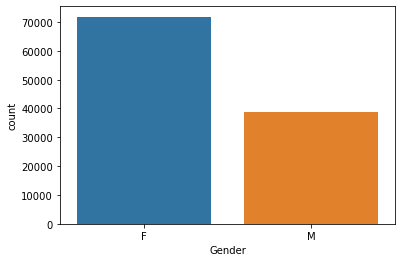

In [174]:
sns.countplot(x ='Gender', data= df)
plt.show()

In [113]:
df.groupby('No-show').mean()


,Age,Scholarship,Hipertension,SMS_received
No-show,,,,
No,37.790064,0.093903,0.204392,0.291334
Yes,34.317667,0.115507,0.169004,0.438371


In [114]:
df_no_show = df[df['No-show'] == 'Yes']
df_show = df[df['No-show'] != 'Yes']


In [160]:
# Histogram function for repetitive codes
def histo(n,s):
    plt.figsize= (14,10)
    n.hist(alpha=1, label= 'No show')
    s.hist(alpha=0.3, label= 'Show')
    plt.legend()

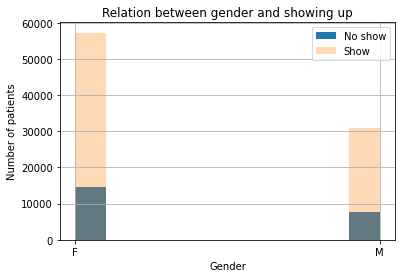

In [161]:
# Gender analysis

histo(df_no_show.Gender, df_show.Gender)
plt.title('Relation between gender and showing up')
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.show()

In [116]:
df_no_show.Gender.value_counts(), df_show.Gender.value_counts()

(F    14594
 M     7725
 Name: Gender, dtype: int64,
 F    57246
 M    30962
 Name: Gender, dtype: int64)

### The numer of males who did not show is around 21% from their total numer, while the percentage of females is around 19%.  

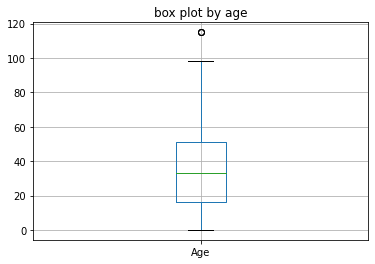

In [117]:
df_no_show.boxplot(column=['Age'])
plt.title('box plot by age')
plt.show()

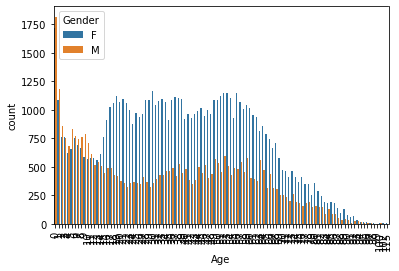

In [180]:
plt.figsize=(14,10)
sns.countplot(x ='Age', data= df, hue= 'Gender')
plt.xticks(rotation= 90)
plt.show()

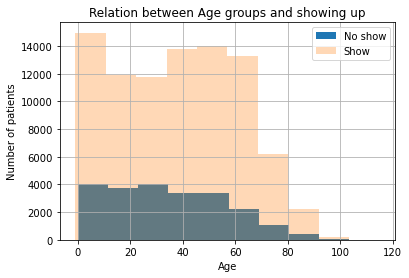

In [181]:
# Age analysis

histo(df_no_show.Age, df_show.Age)
plt.title('Relation between Age groups and showing up')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.show()

In [182]:
df_no_show.Age.value_counts(), df_show.Age.value_counts()

(0      639
 1      415
 17     396
 19     394
 30     369
       ... 
 95       6
 115      3
 97       2
 96       1
 98       1
 Name: Age, Length: 100, dtype: int64,
  0      2900
  1      1858
  52     1449
  56     1372
  2      1366
         ... 
  100       4
  115       2
  102       2
 -1         1
  99        1
 Name: Age, Length: 104, dtype: int64)

### the number of patients who did not show up does not depend on the age groups, but depend on the total number of patients in each group. 

In [183]:
type(df_show.Neighbourhood[2])

str

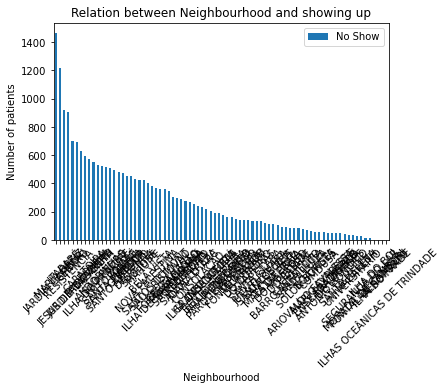

In [184]:
# Neighbourhood analysis

plt.figsize= (20,5)
df_no_show.Neighbourhood.value_counts().plot(kind='bar', label='No Show')
plt.legend()
plt.title('Relation between Neighbourhood and showing up')
plt.xlabel('Neighbourhood')
plt.xticks(rotation= 45)
plt.ylabel('Number of patients')
plt.show()

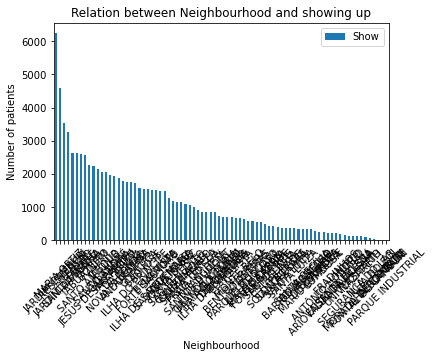

In [185]:
# Neighbourhood analysis

plt.figsize= (20,5)
df_show.Neighbourhood.value_counts().plot(kind='bar', label='Show')
plt.legend()
plt.title('Relation between Neighbourhood and showing up')
plt.xlabel('Neighbourhood')
plt.xticks(rotation= 45)
plt.ylabel('Number of patients')
plt.show()

### Same ratio noshow to show depending on the regions, so we can not say that the distance playing an significant role.

In [186]:
df_no_show.Neighbourhood.value_counts(), df_show.Neighbourhood.value_counts()

(JARDIM CAMBURI                 1465
 MARIA ORTIZ                    1219
 ITARARÉ                         923
 RESISTÊNCIA                     906
 CENTRO                          703
                                ... 
 PONTAL DE CAMBURI                12
 ILHA DO BOI                       3
 ILHAS OCEÂNICAS DE TRINDADE       2
 ILHA DO FRADE                     2
 AEROPORTO                         1
 Name: Neighbourhood, Length: 80, dtype: int64,
 JARDIM CAMBURI       6252
 MARIA ORTIZ          4586
 RESISTÊNCIA          3525
 JARDIM DA PENHA      3246
 SANTA MARTHA         2635
                      ... 
 PONTAL DE CAMBURI      57
 ILHA DO BOI            32
 ILHA DO FRADE           8
 AEROPORTO               7
 PARQUE INDUSTRIAL       1
 Name: Neighbourhood, Length: 80, dtype: int64)

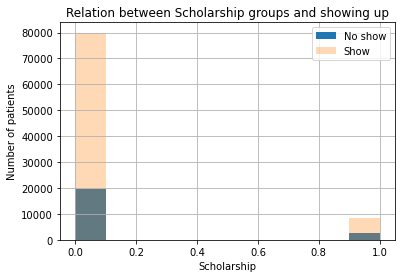

In [187]:
# Scholarship analysis

histo(df_no_show.Scholarship, df_show.Scholarship )
plt.title('Relation between Scholarship groups and showing up')
plt.xlabel('Scholarship')
plt.ylabel('Number of patients')
plt.show()

### Scholarship does not play a significant role in our data.

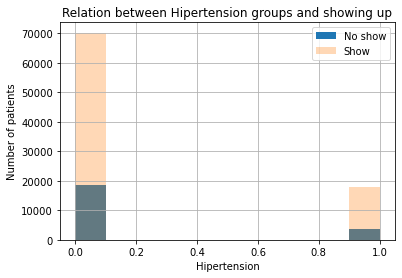

In [188]:
# Hipertension analysis

histo(df_no_show.Hipertension, df_show.Hipertension)
plt.title('Relation between Hipertension groups and showing up')
plt.xlabel('Hipertension')
plt.ylabel('Number of patients')
plt.show()

In [189]:
df_no_show.Hipertension.value_counts(), df_show.Hipertension.value_counts()

(0    18547
 1     3772
 Name: Hipertension, dtype: int64,
 0    70179
 1    18029
 Name: Hipertension, dtype: int64)

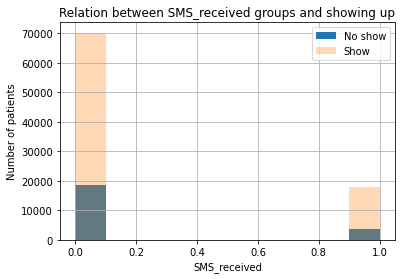

In [190]:
# SMS_received analysis

histo(df_no_show.Hipertension, df_show.Hipertension )
plt.title('Relation between SMS_received groups and showing up')
plt.xlabel('SMS_received')
plt.ylabel('Number of patients')
plt.show()

In [191]:
df_no_show.SMS_received.value_counts(), df_show.SMS_received.value_counts()

(0    12535
 1     9784
 Name: SMS_received, dtype: int64,
 0    62510
 1    25698
 Name: SMS_received, dtype: int64)

### It is a little bit wierd that the patients who recieved a sms did not show up more than who did not recieve.

<a id='conclusions'></a>
# Conclusions:

##     No clear correlation between any of the attributes and the number of patients does not show up. However, the patients who recieved a reminder did not show up, which seems to me that  is a general thing which appear more with increasing of the number of people booking for appointments. 25% is not a little percentage, and it is general. I believe there is more to search about, may be something in the system or something releated to the culuture itself. Mentioning culture here in the context of the data analysis does not releate to good or bad things or nothing about criticizing.

##  Limitations:
### 1- May be the sample taken does not represent the populatin.
### 2- There could have been some sort of intentional or unintentional bias in how the sample was selected.
### 3- The sample need to be retaken again in larger and wider data set.

In [192]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0